---

# Atenção!

Lembre-se de clonar este notebook antes de tentar editar as células de código.

Para isso, basta seguir os passos:

File -> Save a copy in Drive



---

# Epílogo





Vamos relembrar brevemente o algoritmo trivial que desenvolvemos nas etapas anteriores: simplesmente coloque as entregas no primeiro veículo disponível até que ele seja preenchido, e então repita para os próximos veículos até que as entregas sejam finalizadas. A esta altura é evidente o quão ruim este método tende a ser, mas há um aspecto que talvez não esteja tão claro e que o torna ainda pior do que pensamos.

Imagine que um veículo partindo do ponto 0 ficou responsável pelas seguintes cinco entregas:



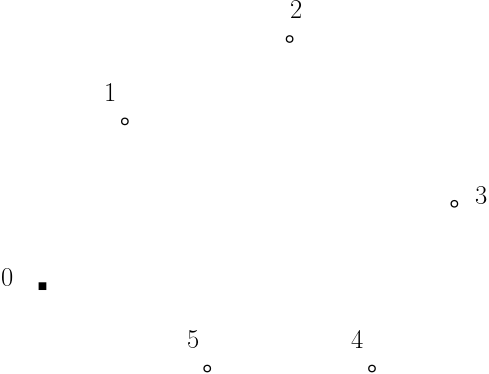

Mesmo sem conhecer suas localizações exatas em um mapa, é razoável assumir que a seguinte rota seria considerada eficiente:

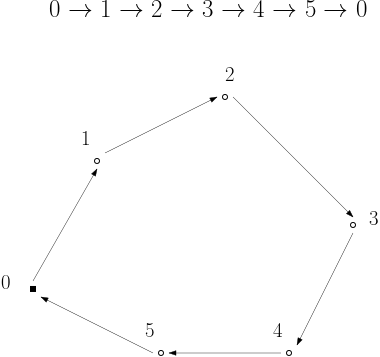


Porém, como não sabemos a ordem com que as entregas chegam para nós, nossas rotas de verdade provavelmente serão cheias de zigue-zague e acabarão assemelhando-se a algo menos eficiente como:

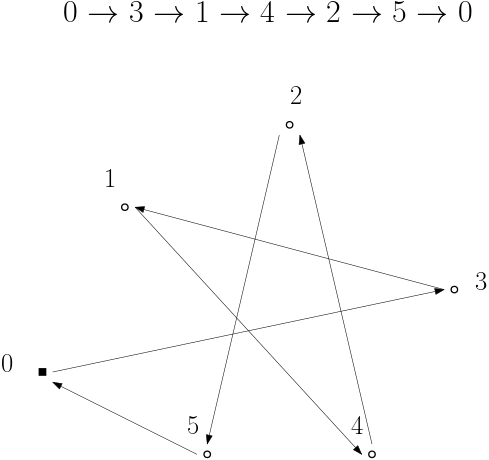


Apesar de não controlarmos esta ordem de chegada, é possível ao menos organizar a sequência com que cada veículo realiza suas entregas. Este é o tema desta aula.

# O Problema do Caixeiro Viajante

## Visão geral


O problema que descrevemos na seção anterior é bem conhecido na literatura de Otimização Combinatória e Pesquisa Operacional como o Problema do Caixeiro Viajante, ou [_Traveling Salesperson Problem_](https://en.wikipedia.org/wiki/Travelling_salesman_problem) (TSP) em inglês. Ele pode ser descrito como:

"Dado um conjunto de cidades/localizações/nós e as distâncias entre eles, qual a rota mais curta que visita cada elemento exatamente uma vez e retorna à origem?"

Para o nosso caso, o caixeiro seria o motorista do veículo, a origem seria o depósito de onde ele busca as entregas, e os nós seriam seus endereços.

Apesar de ser um problema simples de descrever e entender, ele é bastante complicado de ser resolvido exatamente. De fato, ele pertence à classe [NP-difícil](https://en.wikipedia.org/wiki/NP-hardness). Para aqueles menos familirizados com o termo, uma forma simplória de entendê-lo é: à medida que tratamos de problemas com maior número de nós, o tempo gasto para resolvê-los cresce muito mais rápido (veja o Exercício 3). Assim, é mais adequado nos contentarmos com métodos que nos retornam uma rota boa em vez da melhor possível, mas que não demandem tempos impraticáveis.


## Resolvendo o TSP com um algoritmo de força bruta

Apesar da dificuldade do problema, podemos ganhar uma boa visão resolvendo casos com poucas entregas. Considere o seguinte exercício com apenas três entregas:


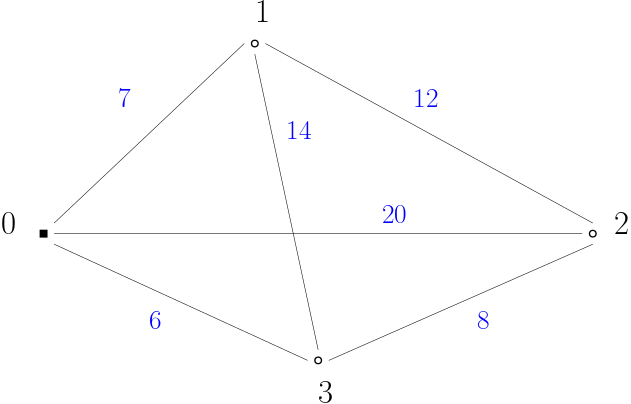



Os números nas ligações indicam a distância em quilômetros de um nó para outro. Por simplicidade, assumimos que as distâncias de ida e volta para cada par de nós são a mesmas.

O primeiro passo em nosso algoritmo é determinar a matriz de distâncias do problema:

In [1]:
import numpy as np


distance_matrix = np.array([
    [0, 7, 20, 6],
    [7, 0, 12, 14],
    [20, 12, 0, 8],
    [6, 14, 8, 0],
])
distance_matrix

array([[ 0,  7, 20,  6],
       [ 7,  0, 12, 14],
       [20, 12,  0,  8],
       [ 6, 14,  8,  0]])

Esta matrix significa que a distância do nó `i` ao nó `j` é data por `distance_matrix[i, j]`. Por exemplo,


In [2]:
# Segundo a imagem, a distância da origem 0 ao nó 1 é 7
print(f"A distância de 0 a 1 é: {distance_matrix[0, 1]}")

# Segundo a imagem, a distância do nó 2 ao nó 1 é 12
print(f"A distância de 2 a 1 é: {distance_matrix[2, 1]}")

# Como a distância de ida e volta é a mesma, a distância de 1 até 2 também é 12
print(f"A distância de 1 a 2 é: {distance_matrix[1, 2]}")

# A distância de um nó até ele mesmo é 0
print(f"A distância de 3 a 3 é: {distance_matrix[3, 3]}")

A distância de 0 a 1 é: 7
A distância de 2 a 1 é: 12
A distância de 1 a 2 é: 12
A distância de 3 a 3 é: 0


Com isso, nós podemos usar esta matriz para calcular a distância total de uma rota. Nós sabemos que cada rota começa na origem 0, percorre todos os nós de 1 a 3 em alguma ordem, e retorna a 0. Aqui está um exemplo de rota:

In [3]:
# 0 -> 1 -> 3 -> 2 -> 0
route1 = [0, 1, 3, 2, 0]
route1

[0, 1, 3, 2, 0]

A distância total desta rota será a soma de

- 0 para 1
- 1 para 3
- 3 para 2
- 2 de volta para 0

ou, usando o código anterior como base:

In [4]:
route_distance1 = (
    distance_matrix[0, 1]
    + distance_matrix[1, 3]
    + distance_matrix[3, 2]
    + distance_matrix[2, 0]
)
route_distance1

49

Como nós sabemos que o primeiro elemento da rota é `route1[0]`, o segundo `route1[1]` e assim por diante, nós podemos deixar isto um pouco mais genérico para outras rotas:

In [5]:
route_distance1 = (
    distance_matrix[route1[0], route1[1]]
    + distance_matrix[route1[1], route1[2]]
    + distance_matrix[route1[2], route1[3]]
    + distance_matrix[route1[3], route1[4]]
)
route_distance1  # mesmo resultado

49

O.k., isso funciona para problemas com até 4 nós. Para lidar com qualquer número de nós, basta usar um loop percebendo que em cada iteração nós calculamos a distância do nó `i` ao nó `i + 1`:

In [6]:
route_distance1 = 0
for i in range(len(route1) - 1):
    route_distance1 += distance_matrix[route1[i], route1[i + 1]]

route_distance1  # novamente, mesmo resultado

49

Vamos incluir isso em uma função para que funcione em qualquer problema:

In [7]:
def compute_route_distance(distance_matrix, route):
    """
    Calcula a distância total de uma rota para uma dada matriz de distâncias
    """
    route_distance = 0
    for i in range(len(route) - 1):
        route_distance += distance_matrix[route[i], route[i + 1]]

    return route_distance


# Experimente testá-la para diferentes rotas
route1 = [0, 1, 3, 2, 0]
route_distance1 = compute_route_distance(distance_matrix, route1)
print(f"A distância total da rota {route1} é de {route_distance1} km")

route2 = [0, 2, 1, 3, 0]
route_distance2 = compute_route_distance(distance_matrix, route2)
print(f"A distância total da rota {route2} é de {route_distance2} km")

route3 = [0, 1, 2, 3, 0]
route_distance3 = compute_route_distance(distance_matrix, route3)
print(f"A distância total da rota {route3} é de {route_distance3} km")

A distância total da rota [0, 1, 3, 2, 0] é de 49 km
A distância total da rota [0, 2, 1, 3, 0] é de 52 km
A distância total da rota [0, 1, 2, 3, 0] é de 33 km


Agora temos todos os ingredientes necessários para construir o algoritmo mais simples possível para o TSP. Dado um problema, nós testamos _todas as possíveis rotas_ e retornamos a mais curta. O ato de testar _todas_ as possibilidades é o que dá o nome "Força bruta" ao método.

Ele segue os seguintes passos. Dada uma matriz de distâncias `distance_matrix` que descreve o problema,

1. Determine o número de nós `n`. Como a matriz de distâncias tem tamanho `n x n`, podemos usar o número de linhas ou de colunas para isso, e.g.,

```python
n = distance_matrix.shape[0]
```

2. Cada rota será composta pelo nó 0, seguido de uma permutação de elementos de 1 a `n`, seguida novamente do nó 0. Teste cada permutação e determine aquela com rota mais curta.

Para testar todas as permutações, podemos usar a função `permutations` da biblioteca `itertools`. Aqui está uma forma de usá-la:

In [8]:
from itertools import permutations


# Substitua por outras listas para ver os resultados
# CUIDADO: não inclua listas muito grandes (até 5 elementos é razoável)
for permutation in permutations([1, 2, 3]):
    print(f"Aqui está uma permutação: {permutation}")

Aqui está uma permutação: (1, 2, 3)
Aqui está uma permutação: (1, 3, 2)
Aqui está uma permutação: (2, 1, 3)
Aqui está uma permutação: (2, 3, 1)
Aqui está uma permutação: (3, 1, 2)
Aqui está uma permutação: (3, 2, 1)


In [9]:
n = distance_matrix.shape[0]
list(range(1, n))

[1, 2, 3]

In [10]:
# Podemos então construir todas as possíveis rotas para qualquer problema
# Para o nosso exemplo em que há n = 4 nós, precisamos das permutações de 1 a 3

n = 4
for permutation in permutations(range(1, n)):
    route = [0] + list(permutation) + [0]
    print(f"Aqui está uma rota: {route}")

Aqui está uma rota: [0, 1, 2, 3, 0]
Aqui está uma rota: [0, 1, 3, 2, 0]
Aqui está uma rota: [0, 2, 1, 3, 0]
Aqui está uma rota: [0, 2, 3, 1, 0]
Aqui está uma rota: [0, 3, 1, 2, 0]
Aqui está uma rota: [0, 3, 2, 1, 0]


Finalmente, temos tudo que precisamos para escrever nosso solver de TSP:

In [11]:
from itertools import permutations

import numpy as np


def solve_tsp_brute_force(distance_matrix):
    """Resolve o TSP por meio de um algoritmo de força bruta"""
    n = distance_matrix.shape[0]  # número de nós do problema
    best_route = None  # inicializa melhor rota como elemento vazio
    best_route_distance = np.inf  # distância inicial é um número muito alto

    for permutation in permutations(range(1, n)):
        route = [0] + list(permutation) + [0]
        route_distance = compute_route_distance(distance_matrix, route)

        # Se esta permutação possuir uma distância total menor que a atual,
        # substitua por ela
        if route_distance < best_route_distance:
            best_route = route
            best_route_distance = route_distance

    return best_route, best_route_distance

def compute_route_distance(distance_matrix, route):
    """
    Calcula a distância total de uma rota para uma dada matriz de distâncias
    """
    route_distance = 0
    for i in range(len(route) - 1):
        route_distance += distance_matrix[route[i], route[i + 1]]

    return route_distance


# Experimente com a matriz de distância que temos
solve_tsp_brute_force(distance_matrix)

([0, 1, 2, 3, 0], 33)

Experimente mudar alguns valores da matriz de distâncias para ver como a solução muda. Observe que é possível que várias rotas possuam a mesma distância total, e neste caso qualquer uma seria uma solução ótima adequada.

## Resolvendo o TSP com um solver comercial: OR-Tools


Construímos na seção anterior um solver que sempre retorna a rota mais curta de qualquer TSP, mas como mencionado no início, o tempo gasto para isso cresce muito rápido à medida que o número de nós aumenta (veja também o Exercício 3). Agora que você já está mais confortável com o problema, podemos introduzir um solver comercial mais adequado para situações práticas.

O solver adotado por nós é o [OR-Tools](https://developers.google.com/optimization). Ele lida com diversos tipos de problemas de otimização, mas nesta aula vamos focar no TSP.

Primeiramente, vamos instalar o OR-Tools:

In [12]:
# Fixamos a versão usada nesta aula por compatibilidade com o futuro
!pip install ortools==9.0.9048


[notice] A new release of pip available: 22.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Esta biblioteca é basicamente um wrapper para o código original que é feito em C++, então vamos precisar de alguns passos e variáveis a mais para poder usá-la.

Para começar, precisamos de uma matriz de distâncias. Vamos usar a mesma da seção anterior, repetida aqui por conveniência:

In [13]:
import numpy as np


distance_matrix = np.array([
    [0, 7, 20, 6],
    [7, 0, 12, 14],
    [20, 12, 0, 8],
    [6, 14, 8, 0],
])
distance_matrix

array([[ 0,  7, 20,  6],
       [ 7,  0, 12, 14],
       [20, 12,  0,  8],
       [ 6, 14,  8,  0]])

Como visto antes, podemos usar índices na matriz para nos referenciar a cada nó do problema. Por exemplo, ao usar os índices 1 e 2 conseguimos instantaneamente determinar a distância do nó 1 ao 2 com `distance_matrix[1, 2]`.

No caso desta biblioteca, precisamos criar um gerenciador para converter cada um destes nós em índices internos do código. Para isso, vamos criar a seguinte variável:

In [14]:
from ortools.constraint_solver import pywrapcp


n = distance_matrix.shape[0]  # número de nós do problema
num_vehicles = 1  # número de veículos (no nosso caso, apenas um)
depot_node = 0  # número do nó que representa o ponto de origem

manager = pywrapcp.RoutingIndexManager(n, num_vehicles, depot_node)
manager

<ortools.constraint_solver.pywrapcp.RoutingIndexManager; proxy of <Swig Object of type 'operations_research::RoutingIndexManager *' at 0x7f8db2152de0> >

Observe que usamos a palavra `vehicle` para representar um caixeiro. Ele não necessariamente precisa viajar por algum veículo, mas como nosso problema principal envolve entregas, vale a pena o uso destes termos para fins de familiaridade.

Se quiser, use o código acima para explorar um pouco essa variável, e.g., digitando `dir(manager)` e observando suas propriedades e métodos. Por exemplo, o método `manager.GetNumberOfNodes` retorna o número de nós do problema (contando o ponto de origem). Verifique se isto faz sentido.

Agora, precisamos criar uma variável com o modelo de roteamento:

In [15]:
routing = pywrapcp.RoutingModel(manager)
routing
# Experimente também explorar seus métodos aqui com `dir(routing)`

<ortools.constraint_solver.pywrapcp.RoutingModel; proxy of <Swig Object of type 'operations_research::RoutingModel *' at 0x7f8db21884e0> >

A seguir, esta variável `routing` precisa de uma função que recebe dois índices e retorna a distância entre eles, e para isso vamos usar nossa matriz de distâncias definida no início.

In [16]:
def distance_callback(i, j):
    # `i` e `j` são índices internos do OR-Tools. Precisamos primeiro
    # convertê-los em nós do nosso problema
    ni = manager.IndexToNode(i)
    nj = manager.IndexToNode(j)
    return distance_matrix[ni, nj]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

Agora, podemos resolver o problema. Há um grande número de algoritmos disponíveis, mas para simplificar vamos usar os métodos definidos como padrão:

In [17]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
solution = routing.SolveWithParameters(search_parameters)
solution

<ortools.constraint_solver.pywrapcp.Assignment; proxy of <Swig Object of type 'operations_research::Assignment *' at 0x7f8db2188300> >

Ótimo, o problema está resolvido. Mas qual é a rota retornada e sua distância total? Bem, tente explorar como antes as propriedades e os métodos dessa variável `solution`.

Um método importante é o `ObjectiveValue`:

In [18]:
solution.ObjectiveValue()

33

E com isso sabemos a distância total da rota, que por sinal é igual à retornada pelo nosso método de força bruta, caracterizando uma solução ótima. Mas qual é esta rota?

A variável `routing` contém um método `Start` que retorna o índice do ponto de partida. Mas lembre-se que índices no OR-Tools são internos, e nós precisamos do nó, que é obtido com o método `manager.IndexToNode`. Logo,

In [19]:
starting_index = routing.Start(0)  # 0 indica o primeiro veículo, no caso único
starting_node = manager.IndexToNode(starting_index)
starting_node

0

In [20]:
starting_index

0

que deve ser 0 como esperado. Agora, basta usar o método `NextVar` para saber qual o próximo índice:

In [21]:
next_index = solution.Value(routing.NextVar(starting_index))
next_node = manager.IndexToNode(next_index)
next_node

3

e assim partiríamos do nó 0 para o nó 3. Podemos repetir este processo até o final da rota, quando o método `routing.IsEnd` retorna `True`. Aqui está um exemplo de código que constrói a rota completa:

In [22]:
route = []

index = routing.Start(0)
node = manager.IndexToNode(index)
route.append(node)

while not routing.IsEnd(index):
    index = solution.Value(routing.NextVar(index))
    node = manager.IndexToNode(index)
    route.append(node)

route

[0, 3, 2, 1, 0]

E com isso temos nossa rota. Observe que enquanto o nosso algoritmo de força bruta tem garantia de retornar a melhor solução possível, o OR-Tools usa _heurísticas_ e logo não existe esta segurança. Em vez disso, seus algoritmos procuram por rotas que sejam boas o suficiente mas gastando tempos de processamento razoáveis. Em alguns problemas pequenos, contudo, a solução costuma ser igual à do nosso solver de força bruta.

Aqui está o código completo de uma função similar ao algoritmo anterior que resolve o TSP usando o OR-Tools:

In [23]:
from ortools.constraint_solver import pywrapcp


def solve_tsp_ortools(distance_matrix):
    n = distance_matrix.shape[0]  # número de nós do problema
    num_vehicles = 1  # número de veículos (no nosso caso, apenas um)
    depot_node = 0  # número do nó que representa o ponto de origem
    manager = pywrapcp.RoutingIndexManager(n, num_vehicles, depot_node)
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(i, j):
        # `i` e `j` são índices internos do OR-Tools. Precisamos primeiro
        # convertê-los em nós do nosso problema
        ni = manager.IndexToNode(i)
        nj = manager.IndexToNode(j)
        return distance_matrix[ni, nj]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Resolve o problema com métodos default
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    solution = routing.SolveWithParameters(search_parameters)

    # Constrói a rota final
    route = []
    index = routing.Start(0)
    node = manager.IndexToNode(index)
    route.append(node)

    while not routing.IsEnd(index):
        index = solution.Value(routing.NextVar(index))
        node = manager.IndexToNode(index)
        route.append(node)

    return route, solution.ObjectiveValue()


# Resolva com nossa matriz de distâncias de antes
solve_tsp_ortools(distance_matrix)

([0, 3, 2, 1, 0], 33)

# Resumo
Esta aula forneceu uma introdução ao Problema do Caixeiro Viajante (ou Traveling Salesperson Problem, TSP) e apresentou dois tipos de solver para resolvê-lo: um baseado em força bruta, com garantia de retornar a melhor rota mas com tempo de processamento impraticável em instâncias grandes, e um baseado no OR-Tools, que é um solver comercial e usa heurísticas para retornar soluções relativamente boas em tempos mais curtos.

O TSP é um tópico relevante em diversas áreas da indústria e da literatura científica, e no nosso contexto ele é de extrema importância para evitar entregas desordenadas e custos de transporte desnecessários.

# Exercícios


## Exercício 1
**Determine a melhor rota para o seguinte problema. Assuma que as distância de ida e volta são as mesmas.**

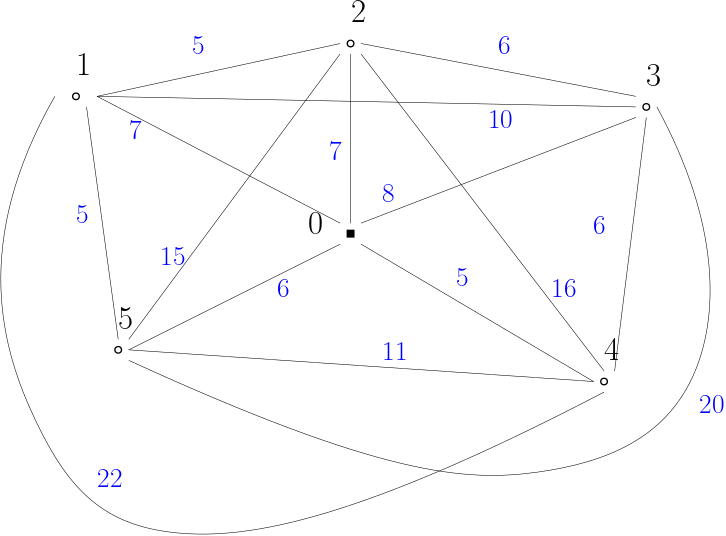

In [ ]:
# Programe aqui sua solução

## Exercício 2
**Determine a rota para o mesmo problema anterior, porém assumindo que a distância de ida em cada aresta é 0.9 o valor da volta, arredondado para o inteiro mais próximo. Compare as soluções em cada caso.**

Dica: uma forma mais fácil de ver isso é  

```python
distance_matrix[i, i + 1] = round(0.9 * distance_matrix[i + 1, i])
```

Curiosidade: o problema neste caso é considerado _assimétrico_, já que a distância de ida é diferente da de volta. Enquanto alguns algoritmos populares só funcionam se o problema for _simétrico_, isso não é um empecilho para nosso solver.


In [ ]:
# Programe aqui sua solução

## Exercício 3

**Determine até que ponto nosso solver de força bruta é praticável.**

Resolva problemas de tamanho crescente e registre o tempo de processamento gasto. Por exemplo, comece com `n = 3` e aumente este número de um em um até que o tempo de processamento fique muito longo, por exemplo, passe de um minuto. Para cada `n`, você pode gerar matrizes de distância com números aleatórios de 0 a 20.

Dica: veja a função `randint` da biblioteca `numpy` para gerar as matrizes de distâncias, e a função `default_timer` da biblioteca `timeit` para calcular o tempo de execução.

In [ ]:
# Programe aqui sua solução

## Exercício 4
**Resolva os Exercícios 1 e 2 usando o OR-Tools. Compare as soluções.**

In [ ]:
# Programe aqui sua solução

## Exercício 5
**Repita o Exercício 3 para o OR-Tools para os mesmos valores de `n` tratados lá. Compare os tempos de execução e a qualidade das soluções.**

In [ ]:
# Programe aqui sua solução

## Exercício suplementar 1
**Experimente com outros algoritmos no OR-Tools**

Consulte a documentação do OR-Tools e a [seção do TSP](https://developers.google.com/optimization/routing/tsp) para ver como mudar os parâmetros do algoritmo.

Sugestão: Crie matrizes de distância aleatórias com tamanhos variados (e.g., 10, 50, 100, 150 e 200), reserve ao menos três métodos, e compare as soluções tanto em distância da rota final como em tempo de processamento.

In [ ]:
# Programe aqui sua solução

## Exercício suplementar 2

Relembre o algoritmo trivial construído na seção anterior. Agora sabemos conceitualmente como a resolução de um TSP pode ajudar a melhorar um pouco seu desempenho.

Determine isso na prática implementando algum dos solvers desta aula (ou qualquer outro de sua escolha) no algoritmo anterior e compare as rotas geradas tanto visualmente como em distância total.

In [ ]:
# Programe aqui sua solução